In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\dip07\Downloads\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 600x400 with 0 Axes>

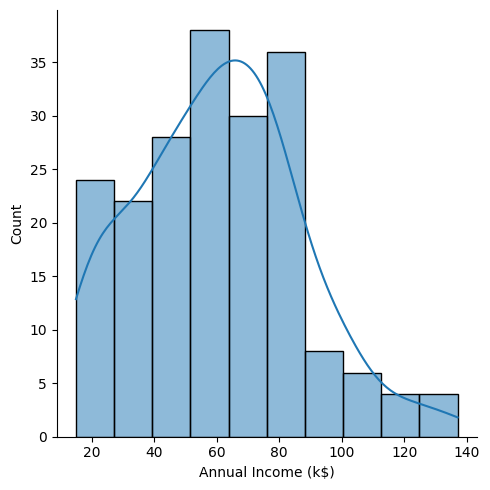

In [5]:
plt.figure(figsize=(6, 4))
sns.displot(df['Annual Income (k$)'],kde=True);

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

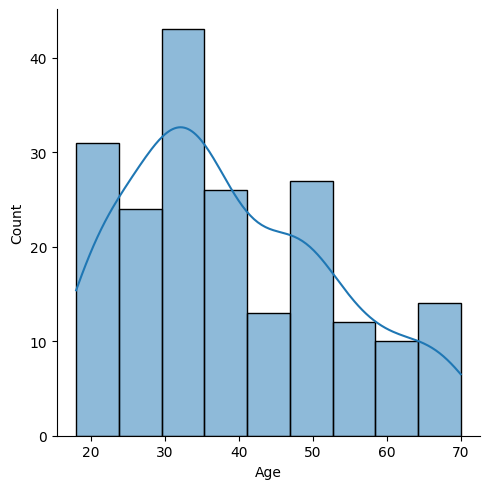

<Figure size 640x480 with 0 Axes>

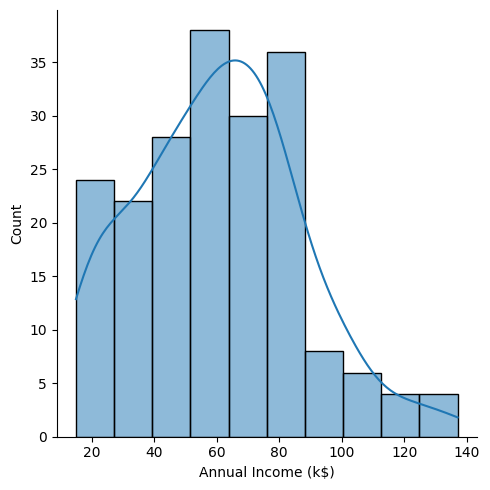

<Figure size 640x480 with 0 Axes>

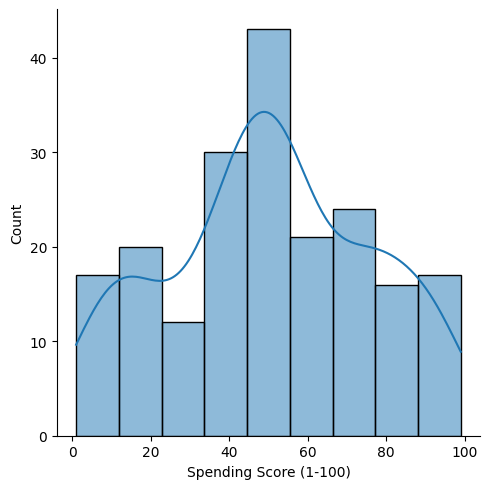

In [7]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.displot(df[i],kde=True)

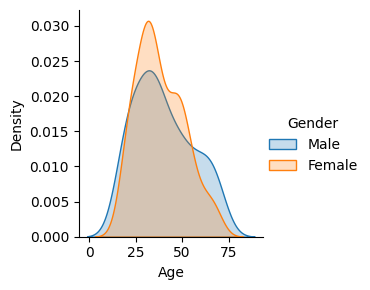

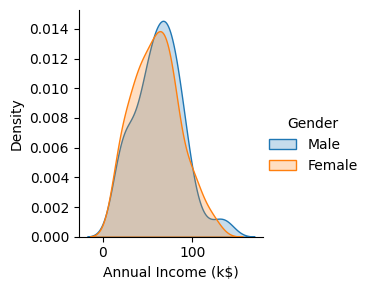

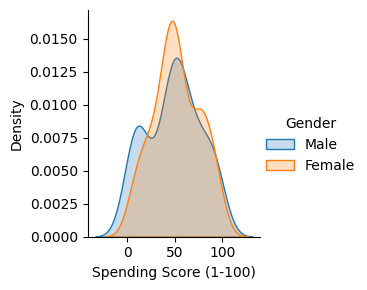

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    g = sns.FacetGrid(df, hue='Gender')
    g.map(sns.kdeplot, i, shade=True)
    g.add_legend()
    plt.show()

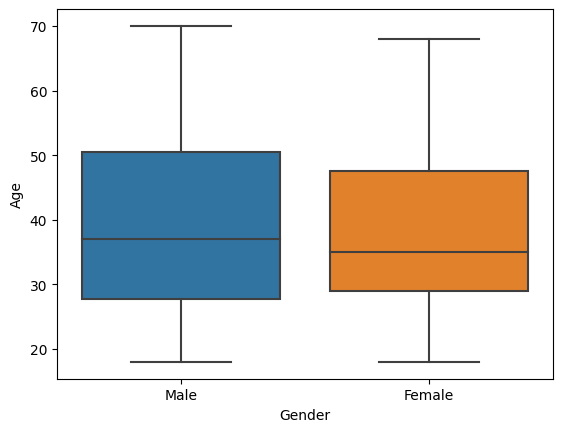

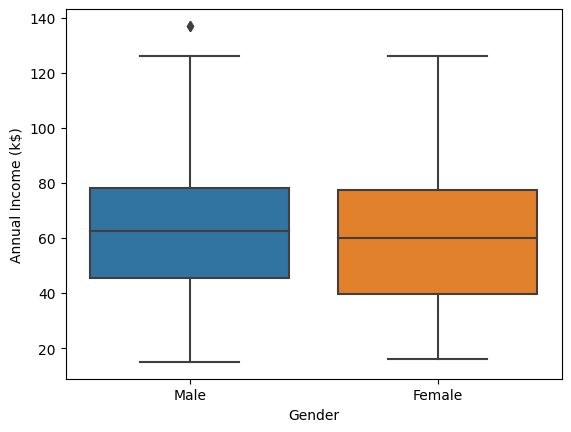

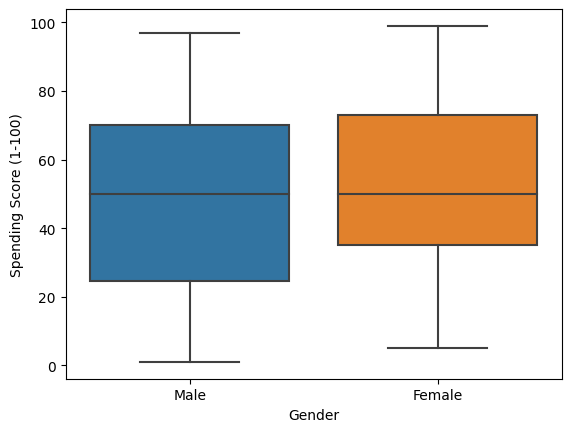

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [10]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

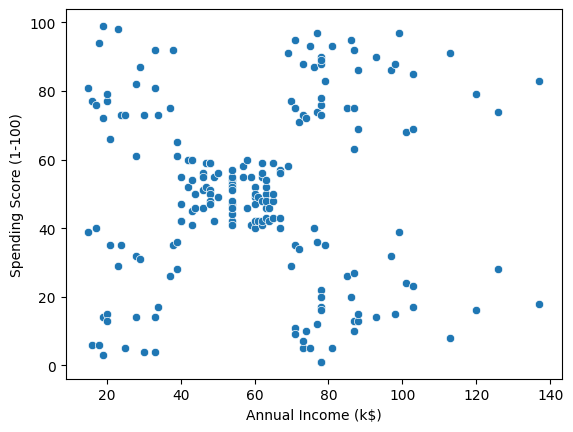

In [11]:
sns.scatterplot(data=df,x='Annual Income (k$)' ,y='Spending Score (1-100)' );

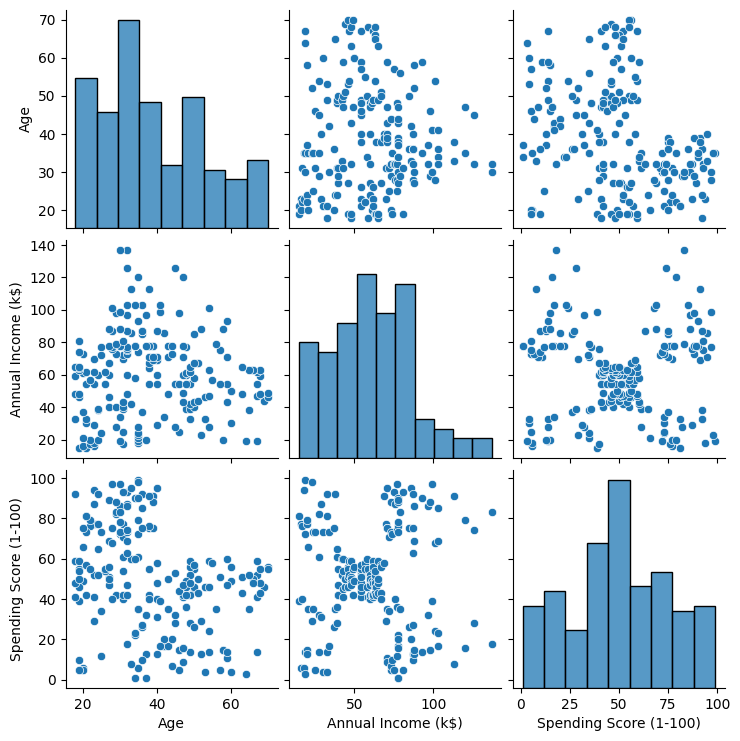

In [12]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df);

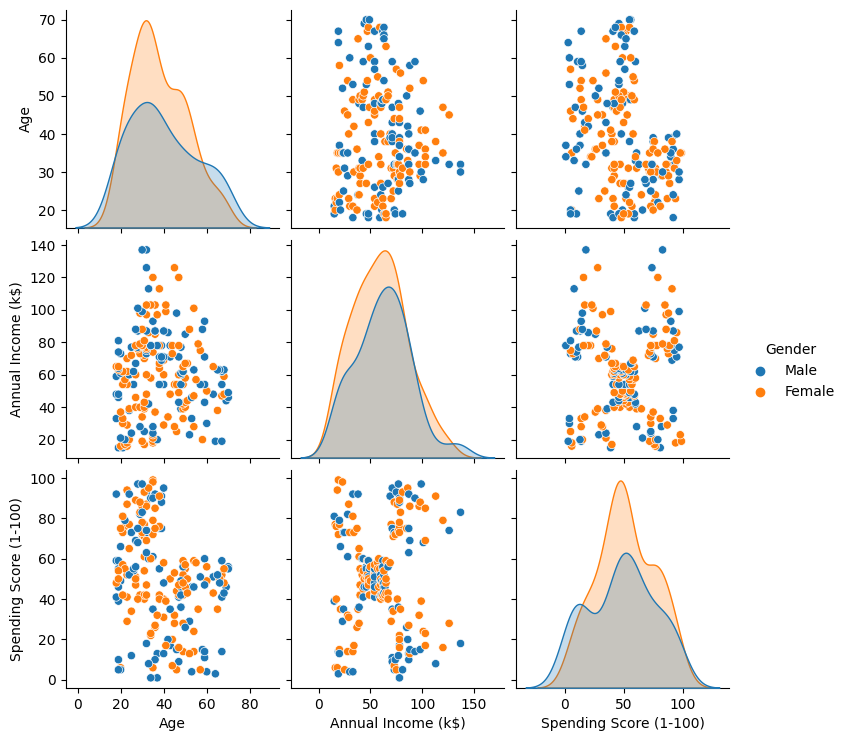

In [13]:
columns = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_subset = df[columns]  # Select only the desired columns

sns.pairplot(df_subset,hue='Gender')

In [14]:
df.groupby('Gender')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

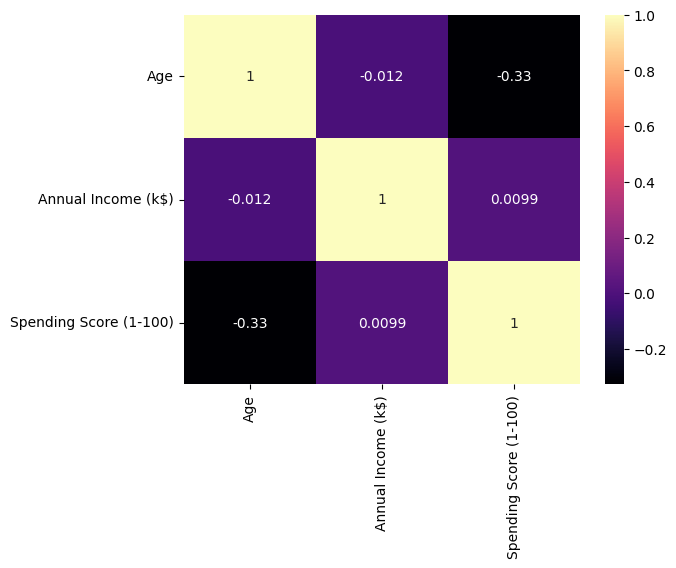

In [16]:
sns.heatmap(df.corr(),annot=True,cmap="magma")

# Clustring - Univariate, Bivariate, Multivariate

In [17]:
clusterings1 = KMeans(n_clusters=3)

In [18]:
clusterings1.fit(df['Annual Income (k$)'].values.reshape(-1,1))

KMeans(n_clusters=3)

In [19]:
clusterings1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
df['Income Cluster'] = clusterings1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [21]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [22]:
clusterings1.inertia_

23517.330930930933

In [23]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [24]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23528.15217391304,
 13278.112713472485,
 8481.496190476191,
 5081.48466026727,
 3931.988095238096,
 2822.4996947496948,
 2189.2563714063717,
 1748.8686813186814]

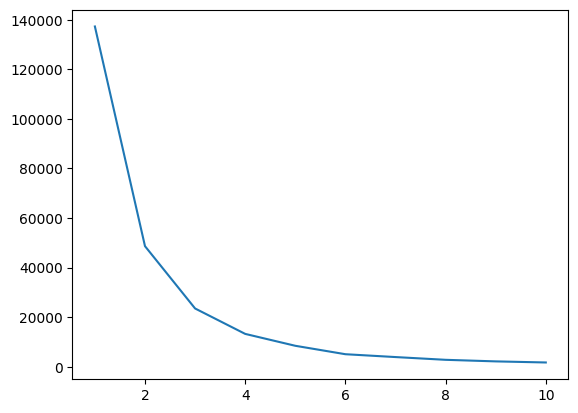

In [25]:
plt.plot(range(1,11),intertia_scores)

In [26]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [27]:
clusterings2 = KMeans(n_clusters=5)
clusterings2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clusterings2_labels = clusterings2.labels_
df['Spending and Income Cluster'] = clusterings2_labels
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


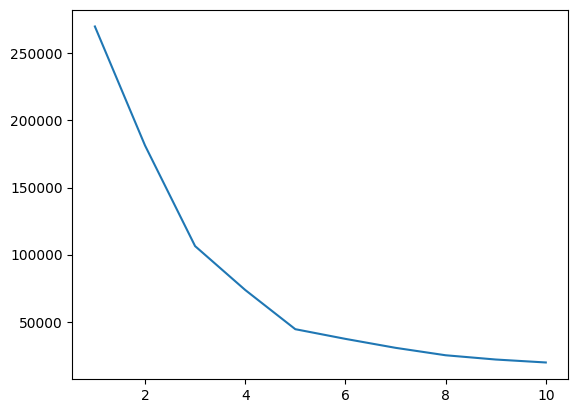

In [28]:
intertia_scores2=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [29]:
centers= pd.DataFrame(clusterings2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


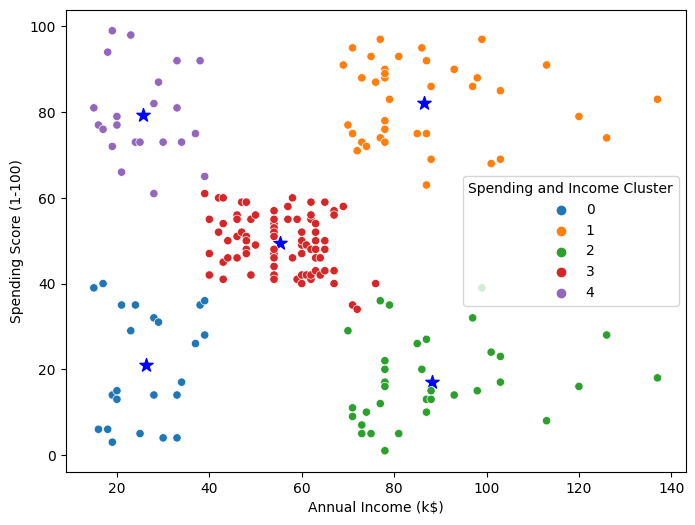

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='blue',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette= 'tab10' );

In [31]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [32]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


# multivariate clustering

In [34]:
from sklearn.preprocessing import StandardScaler

In [43]:
scale = StandardScaler()

In [44]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,4,1
2,20,16,6,1,0,0
3,23,16,77,1,4,0
4,31,17,40,1,0,0


In [45]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [46]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [48]:
dff= pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


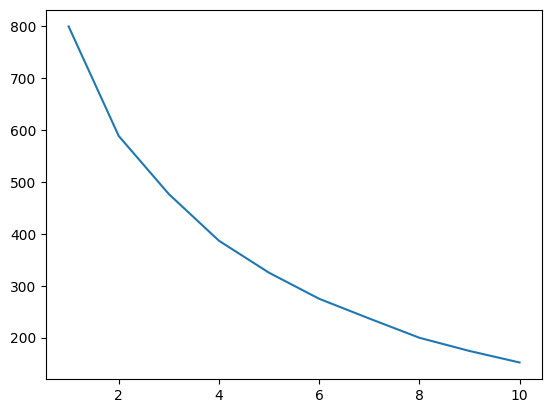

In [51]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

In [52]:
df.to_csv("clustering.csv")